In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for inline display
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 5)

In [6]:
# Generate base data
np.random.seed(42)
num_samples = 50
X = np.linspace(0, 20, num_samples) # array of 50 points from 0 to 10

true_rel = 0.02*X**4 - 0.8*X**3 + 10*X**2 - 40*X + 100

def train_and_visualize(degree, learning_rate=0.01, num_iterations=100, noisiness=2.0):
    """
    Generate data for, train, and visualize a multinomial regression model.
    """

    # Generate noisy data
    np.random.seed(42)
    y = true_rel + np.random.randn(50) * noisiness
    
    # FEATURE SCALING - normalize X to prevent huge values
    X_mean = X.mean()
    X_std = X.std()
    X_norm = (X - X_mean) / X_std  # Scale X to mean=0, std=1
    
    # Precalculate using NORMALIZED X
    X_poly = np.array([[x**i for i in range(degree, -1, -1)] for x in X_norm])

    # Initialize parameters/weights
    weights = np.zeros(degree + 1)
    history = {'coeffs': [weights.copy()], 'loss': []}
    
    # Training loop - Gradient Descent
    for i in range(num_iterations):
        # Forward pass
        y_pred = X_poly @ weights
        
        # Compute loss/error (Mean Squared Error)
        loss = np.mean((y - y_pred) ** 2)
        history['loss'].append(loss)
        
        # Compute gradients
        gradients = -2 * X_poly.T @ (y - y_pred) / num_samples
        
        # Update parameters
        weights -= learning_rate * gradients
        
        # Store weight values for viz
        history['coeffs'].append(weights.copy())
    
    # Create visualization
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    
    # Plot 1: Data and fitted line
    axes[0].scatter(X, y, alpha=0.6, s=50, label='Training Data', color='blue')
    axes[0].plot(X, true_rel, 'g--', linewidth=2.5, label='True line', alpha=0.7)
    
    # Plot using NORMALIZED X_plot, but display with original X values
    X_plot = np.linspace(X.min(), X.max(), 100)
    X_plot_norm = (X_plot - X_mean) / X_std  # Normalize plot points too!
    X_plot_poly = np.array([[x**i for i in range(degree, -1, -1)] for x in X_plot_norm])
    y_plot = X_plot_poly @ weights
    
    def format_polynomial_equation(weights, degree):
        """Format polynomial equation as string like 'y=2.5x^3-1.2x^2+3.1x+5.0'"""
        terms = []

        for j, coeff in enumerate(weights):
            power = degree - j

            # Skip very small coefficients
            if abs(coeff) < 0.001:
                continue

            # Format coefficient with sign
            if len(terms) == 0:  # First term
                sign = "" if coeff >= 0 else "-"
                coeff_str = f"{abs(coeff):.2f}"
            else:  # Subsequent terms
                sign = "+" if coeff >= 0 else "-"
                coeff_str = f"{abs(coeff):.2f}"

            # Format the term based on power
            if power == 0:
                term = f"{sign}{coeff_str}"
            elif power == 1:
                term = f"{sign}{coeff_str}x"
            else:
                term = f"{sign}{coeff_str}x^{power}"

            terms.append(term)

        return "y=" + "".join(terms)

    equation = format_polynomial_equation(weights, degree)
    axes[0].plot(X_plot, y_plot, 'r-', linewidth=2.5, label=f'Fitted: {equation}')
    
    axes[0].set_xlabel('X', fontsize=12)
    axes[0].set_ylabel('y', fontsize=12)
    axes[0].set_title(f'Multinomial Regression Result \n(degree {degree}; noise_mult {noisiness}); learn {learning_rate})', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Loss over time
    axes[1].plot(history['loss'], linewidth=2.5, color='purple')  # Remove log for debugging
    axes[1].set_xlabel('Iteration', fontsize=12)
    axes[1].set_ylabel('Loss (MSE)', fontsize=12)
    axes[1].set_title(f'Loss During Training (LR {learning_rate})', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Parameter evolution
    coeffs_history = np.array(history['coeffs'])
    labels = [f'x^{degree-j}' if degree-j>1 else
              ('x' if degree-j == 1 else 'const') 
              for j in range(degree + 1)]

    for j, label in enumerate(labels):
        axes[2].plot(coeffs_history[:, j], label=label, linewidth=2.5)
        axes[2].axhline(y=weights[j], color=f'C{j}', linestyle='--', 
                        alpha=0.5, linewidth=2)
        
    axes[2].set_xlabel('Iteration', fontsize=12)
    axes[2].set_ylabel('Parameter Value', fontsize=12)
    axes[2].set_title('Parameter Evolution', fontsize=14, fontweight='bold')
    axes[2].legend(fontsize=10)
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    final_loss = history['loss'][-1]
    print(f"\n{'='*60}")
    print(f"Training Results")
    print(f"{'='*60}")
    print(f"Parameters Used:")
    print(f"  Fitted model degree:  {degree}")
    print(f"  Learning Rate:  {learning_rate:.6f}")
    print(f"  Iterations:     {num_iterations}")
    print(f"  Noise Level:    {noisiness:.2f}")
    print(f"\nFinal Results:")
    for i in range(degree + 1):
        print(f"  w{i} (x^{degree-i} coeff): {weights[i]:.4f}")
    print(f"  Final Loss:     {final_loss:.4f}")
    print(f"{'='*60}")

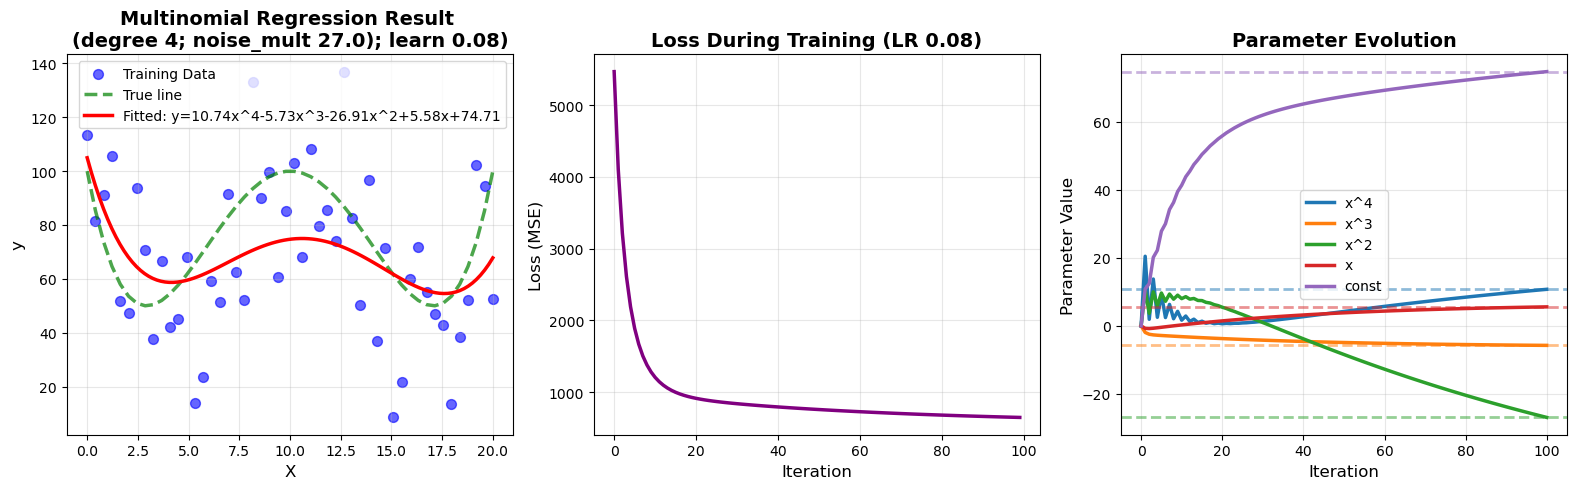


Training Results
Parameters Used:
  Fitted model degree:  4
  Learning Rate:  0.080000
  Iterations:     100
  Noise Level:    27.00

Final Results:
  w0 (x^4 coeff): 10.7400
  w1 (x^3 coeff): -5.7341
  w2 (x^2 coeff): -26.9076
  w3 (x^1 coeff): 5.5828
  w4 (x^0 coeff): 74.7075
  Final Loss:     645.5519


interactive(children=(IntSlider(value=4, continuous_update=False, description='Degree of multinomial model:', …

In [36]:
interact(
    train_and_visualize,
    degree=IntSlider(
        value=4,
        description='Degree of multinomial model:',
        style={'description_width': 'initial'},
        continuous_update=False
    ),
    learning_rate=FloatSlider(
        value=0.08,
        description='Learning Rate:',
        style={'description_width': 'initial'},
        continuous_update=False
    ),
    num_iterations=IntSlider(
        value=3000,
        step=10,
        description='Iterations:',
        style={'description_width': 'initial'},
        continuous_update=False
    ),
    noisiness=FloatSlider(
        value=27,
        step=0.1,
        description='Noise Level:',
        style={'description_width': 'initial'},
        continuous_update=False
    )
);